##

In [1]:
import numpy as np
import pandas as pd
import cptac as cptac
import seaborn as sns
# # import biograder
# biograder.download("bio462_hw4")
# hw = biograder.bio462_hw4(student_id = 'CG_Final_Project')

### Part 1: Data Loading and Processing

##

In [2]:
# download BRCA data
cptac.download('brca')
brca = cptac.Brca()
brca_CNV = brca.get_CNV()

In [3]:
import biograder
biograder.download("bio462_hw4")
hw = biograder.bio462_hw4(student_id = 'CG_Final_Project') #Instantiate the homework grader object.

locations = hw.getData(name='gene_locations')
locations = locations.copy()
locations = locations.set_index("Database_ID")

In [4]:
locations

,start_bp,end_bp,chromosome
Database_ID,,,
ENSG00000215790.2,1724838,1745999,1
ENSG00000162636.11,108560089,108644900,1
ENSG00000199104.2,86264694,86264788,10
NaN,46017024,46027742,3
NaN,52267698,52276724,14
...,...,...,...
NaN,45105968,45106099,7
NaN,110375138,110384442,2
ENSG00000135828.7,182573634,182589256,1


In [5]:
brca_CNV_t = brca_CNV.transpose()
locations = hw.getData(name='gene_locations')

# join locations and BRCA data
# merged_df = locations.merge(brca_CNV_t, left_on='Database_ID', right_on='Database_ID')
merged_df = pd.merge(locations, brca_CNV_t, how = 'inner', on = ['Database_ID', 'Name'])
merged_df = merged_df[~merged_df.index.duplicated(keep='first')]
sorted_df = merged_df.sort_values(by = ['chromosome', 'start_bp'])

# Clustering

In [6]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [7]:
final_df = sorted_df.iloc[:,4:]
final_df

,CPT000814,CPT001846,X01BR001,X01BR008,X01BR009,X01BR010,X01BR015,X01BR017,X01BR018,X01BR020,...,X20BR002,X20BR005,X20BR006,X20BR007,X20BR008,X21BR001,X21BR002,X21BR010,X22BR005,X22BR006
Name,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.098,0.395,-0.166,0.111,-0.212,0.022,-0.337,0.201,-0.044,0.141,...,-0.025,0.001,-0.140,-0.077,-0.214,-0.311,0.086,0.186,-0.291,-0.044
FAM138A,0.098,0.395,-0.166,0.111,-0.212,0.022,-0.337,0.201,-0.044,0.141,...,-0.025,0.001,-0.140,-0.077,-0.214,-0.311,0.086,0.186,-0.291,-0.044
OR4F5,0.098,0.395,-0.166,0.111,-0.212,0.022,-0.337,0.201,-0.044,0.141,...,-0.025,-0.310,-0.140,-0.077,-0.214,-0.311,0.086,0.186,-0.291,-0.044
OR4F29,0.098,0.395,-0.166,0.111,-0.212,0.022,-0.337,0.201,-0.044,0.141,...,-0.025,-0.310,-0.140,-0.077,-0.214,-0.311,0.086,0.186,-0.291,-0.044
OR4F16,0.098,0.395,-0.166,0.111,-0.212,0.022,-0.337,0.201,-0.044,0.141,...,-0.025,-0.310,-0.140,-0.077,-0.214,-0.311,0.086,0.186,-0.291,-0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIR602,0.059,-0.202,0.138,-0.069,-0.175,0.072,0.126,0.406,0.011,-0.432,...,-0.278,-0.181,-0.088,-0.387,-0.175,-0.126,0.000,-0.035,-0.228,-0.003
CACNA1B,0.059,-0.202,0.138,-0.069,-0.175,0.072,0.126,0.406,0.011,-0.432,...,-0.278,-0.181,-0.088,-0.387,-0.175,-0.126,0.000,-0.035,-0.228,-0.003
TUBBP5,0.059,-0.202,0.138,-0.069,-0.175,0.072,0.126,0.406,0.011,-0.060,...,-0.278,-0.181,-0.088,-0.387,-0.175,-0.126,0.000,-0.035,-0.228,-0.003


c:\Users\tzhan\PythonWS\02710_Spring2023\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


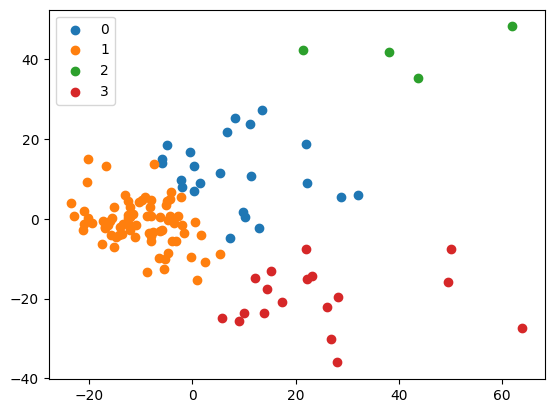

In [8]:
# PCA
cluster_df = sorted_df.iloc[:,4:].T
pca = PCA(n_components=2,random_state=1)
df = pca.fit_transform(cluster_df)

kmeans = KMeans(n_clusters= 4)


label = kmeans.fit_predict(df) 
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

[0 1 2 3]


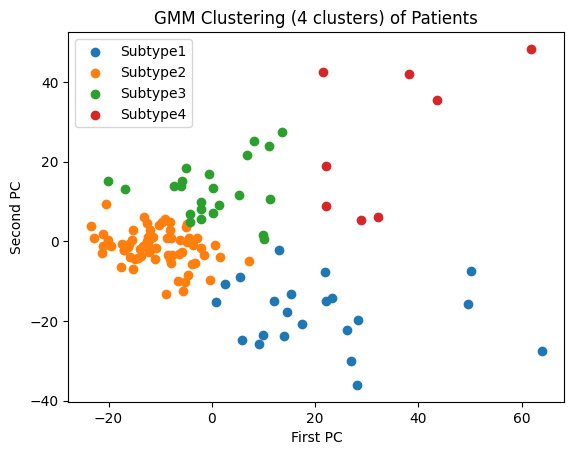

In [9]:
gmm = GaussianMixture(n_components=4, random_state=1)  # Number of clusters to form
label = gmm.fit_predict(df)  # Predict labels for all data points
u_labels = np.unique(label)  # Get unique labels

print(u_labels)

for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label='Subtype'+str(i+1))
plt.legend()
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('GMM Clustering (4 clusters) of Patients')
plt.show()

In [10]:
# get GMM pandas data frame
gmm_dict = {'First_PC': df[:,0], 'Second_PC': df[:,1], 'Labels': label}
gmm_df = pd.DataFrame(gmm_dict)
gmm_df['Labels'] = pd.to_numeric(gmm_df['Labels'])
gmm_df.head(2)

,First_PC,Second_PC,Labels
0,17.469391,-20.847936,0
1,-0.317517,-9.617601,1


Text(0.5, 1.0, 'GMM clustering on Patients (First 2 PCs)')

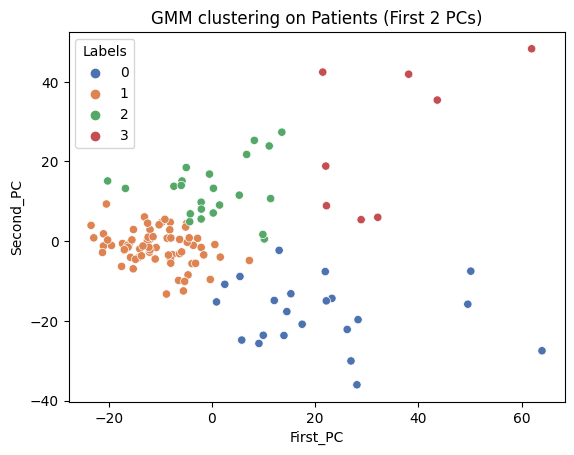

In [11]:
# make scatter plot
sns.scatterplot(data=gmm_df, x='First_PC', y='Second_PC', hue='Labels', palette='deep')
plt.title('GMM clustering on Patients (First 2 PCs)')

In [12]:
cluster_df_copy = cluster_df.copy()
cluster_df_copy['label'] = label
cluster_df_copy.head()
clusters = cluster_df_copy.groupby('label')
cluster_seqs = clusters.mean()

In [67]:
# Function: reassigns 'n' points to a random cluster_id (original cluster id is possible)
def Reassign_n_cluster_ids(gmm_df, n):
    selected_rows = np.random.choice(gmm_df.shape[0], replace = False, size = n)
    # new_gmm_df.iloc[selected_rows]

    #print(new_gmm_df)
    #print(gmm_df.shape[0])
    gmm_df = gmm_df.copy(deep = True)
    for row in selected_rows:
        #print(row)
        row = gmm_df.index[row]
        gmm_df.loc[row,'Labels'] = np.random.randint(4) # 4 is number of clusters
    #gmm_df['Labels'].value_counts() # print for testing purposes
    return gmm_df

In [68]:
# test that reaassign works
print(gmm_df['Labels'].value_counts()) # print for testing purposes
new_gmm_df = Reassign_n_cluster_ids(gmm_df, 2)
print("/////////")
new_gmm_df['Labels'].value_counts() # print for testing purposes

1    69
2    23
0    22
3     8
Name: Labels, dtype: int64
/////////


1    69
2    23
0    22
3     8
Name: Labels, dtype: int64

In [69]:
import hmm
import importlib
importlib.reload(hmm)
def ComputeLogLikelihood(cluster_seqs):
    states = ["-1", "-0.5", "0", "1", "2"] # States should be list of strings.
    transition = {} # Transition is a dictionary of dictionaries.
    for i in states:
        transition[i] = {}
        for j in states:
            if i == j:
                transition[i][j] = np.log(0.4)
            else:
                transition[i][j] = np.log(0.15)
    emission = {} # Emission is dictionary of lists. each key is mean, variance.
    for i in states:
        emission[i] = [float(i), 1] 
    p_init_state = {i: np.log(1/len(states)) for i in states}

    log_likelihood = 0
    for ind in cluster_seqs.index:
        seq = [cluster_seqs.loc[ind].to_list()]
        state_seq, new_transmission, new_emission = hmm.ViterbiTraining(seq, states, transition, emission,p_init_state)
        log_likelihood += hmm.LogLikelihood(seq, state_seq, new_emission, new_transmission, p_init_state)
    
    return log_likelihood

In [79]:
# Need to calculate likelihood... (next step)

# Starting GMM data frame
# gmm_dict = {'First_PC': df[:,0], 'Second_PC': df[:,1], 'Labels': label}
# gmm_df = pd.DataFrame(pca_dict)
# gmm_df['Labels'] = pd.to_numeric(gmm_df['Labels'])
cluster_df_copy = cluster_df.copy()
cluster_df_copy['Labels'] = label
print(cluster_df_copy['Labels'].value_counts(), cluster_df_copy['Labels'].value_counts().sum())
clusters = cluster_df_copy.groupby('Labels')
cluster_seqs = clusters.mean()
ll = ComputeLogLikelihood(cluster_seqs) # need to write function

ll_record = [ll]
for i in range(20): # this should be a higher number 'm' probably (check paper)
    new_cluster_df = Reassign_n_cluster_ids(cluster_df_copy, 2)
    print(new_cluster_df['Labels'].value_counts(), new_cluster_df['Labels'].value_counts().sum())
    clusters = new_cluster_df.groupby('Labels')
    cluster_seqs = clusters.mean()
    ll_new = ComputeLogLikelihood(cluster_seqs)
    ll_record.append(ll_new)
    if ll_new < ll:
        print('Hi')
        ll = ll_new
        cluster_df_copy = new_cluster_df
    # need to track previous and current likelihood
    # need to see if likelihood is converged based on the 'm' comparisons
    # if not, run HMM again and then go back to the GMM reassignment tests



1    60
0    30
2    21
3    11
Name: Labels, dtype: int64 122
1    59
0    30
2    22
3    11
Name: Labels, dtype: int64 122
1    60
0    30
2    21
3    11
Name: Labels, dtype: int64 122
1    58
0    31
2    21
3    12
Name: Labels, dtype: int64 122
Hi
1    58
0    31
2    21
3    12
Name: Labels, dtype: int64 122
1    58
0    30
2    22
3    12
Name: Labels, dtype: int64 122
Hi
1    58
0    30
2    22
3    12
Name: Labels, dtype: int64 122
1    59
0    30
2    22
3    11
Name: Labels, dtype: int64 122
1    58
0    30
2    21
3    13
Name: Labels, dtype: int64 122
1    58
0    31
2    22
3    11
Name: Labels, dtype: int64 122
Hi
1    58
0    31
2    22
3    11
Name: Labels, dtype: int64 122
1    57
0    31
2    22
3    12
Name: Labels, dtype: int64 122
Hi
1    56
0    31
2    23
3    12
Name: Labels, dtype: int64 122


Text(0.5, 0.98, 'Loglikelihood of clusters')

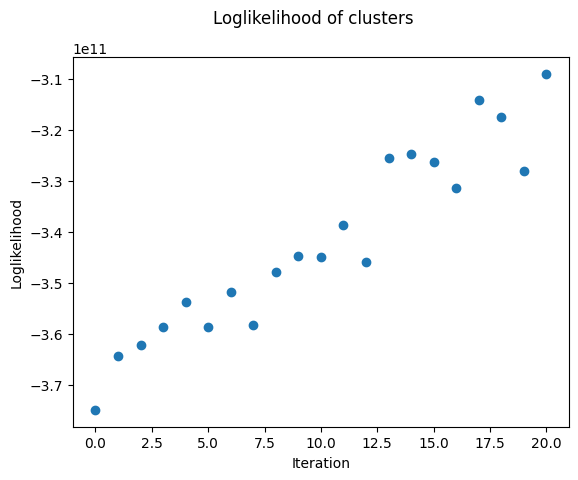

In [ ]:
fig, ax = plt.subplots(1,1)
ax.scatter(range(len(ll_record)), ll_record)
ax.set_xlabel('Iteration')
ax.set_ylabel('Loglikelihood')
fig.suptitle('Loglikelihood of clusters')

[0 1 2 3]


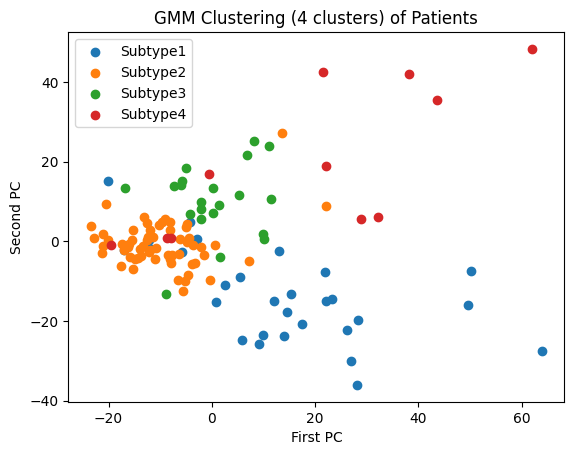

In [ ]:
df = pca.fit_transform(cluster_df_copy)
label = cluster_df_copy['Labels']  # Predict labels for all data points
u_labels = np.unique(label)  # Get unique labels

print(u_labels)

for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label='Subtype'+str(i+1))
plt.legend()
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('GMM + HMM Clustering (4 clusters) of Patients')
plt.show()

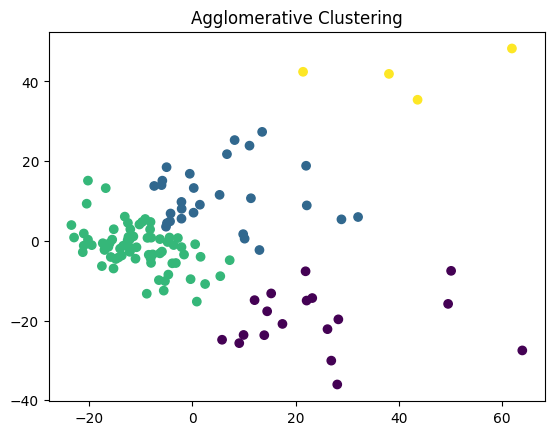

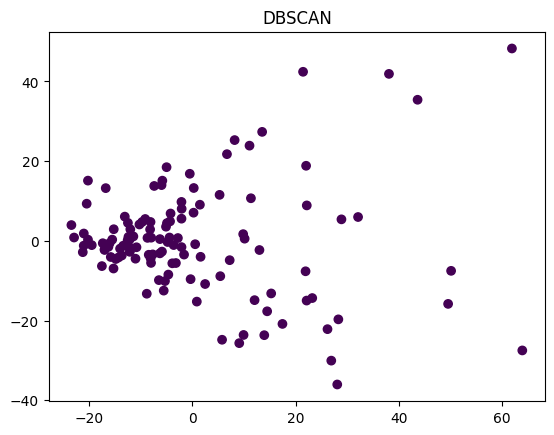

In [59]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

agg = AgglomerativeClustering(n_clusters=4).fit(df)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(df)

agg_labels = agg.labels_
dbscan_labels = dbscan.labels_

plt.scatter(df[:, 0], df[:, 1], c=agg_labels)
plt.title('Agglomerative Clustering')
plt.show()

# Visualize DBSCAN
plt.scatter(df[:, 0], df[:, 1], c=dbscan_labels)
plt.title('DBSCAN')
plt.show()


In [60]:
labels_df = pd.DataFrame(agg_labels, index=cluster_df.index, columns=['cluster'])
display(labels_df)

# transpose the original dataframe and join with the labels
new_df = cluster_df.join(labels_df)

# transpose back to the original orientation
new_df = new_df
display(new_df)

,cluster
CPT000814,0
CPT001846,2
X01BR001,0
X01BR008,2
X01BR009,0
...,...
X21BR001,1
X21BR002,2
X21BR010,2
X22BR005,2


,DDX11L1,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,...,ZMYND19,ARRDC1,C9orf37,EHMT1,MIR602,CACNA1B,TUBBP5,FAM157B,SNORD61,cluster
CPT000814,0.098,0.098,0.098,0.098,0.098,0.098,0.098,0.098,0.098,0.098,...,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.617,0
CPT001846,0.395,0.395,0.395,0.395,0.395,0.395,0.395,0.395,0.395,0.395,...,-0.202,-0.202,-0.202,-0.202,-0.202,-0.202,-0.202,-0.202,-0.111,2
X01BR001,-0.166,-0.166,-0.166,-0.166,-0.166,-0.166,-0.166,-0.166,-0.166,-0.166,...,0.138,0.138,0.138,0.138,0.138,0.138,0.138,0.138,-0.015,0
X01BR008,0.111,0.111,0.111,0.111,0.111,0.111,0.111,0.111,0.111,0.111,...,-0.069,-0.069,-0.069,-0.069,-0.069,-0.069,-0.069,-0.069,-0.048,2
X01BR009,-0.212,-0.212,-0.212,-0.212,-0.212,-0.212,-0.212,-0.212,-0.212,-0.212,...,-0.175,-0.175,-0.175,-0.175,-0.175,-0.175,-0.175,-0.175,0.674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.311,-0.311,-0.311,-0.311,-0.311,-0.311,-0.311,-0.311,-0.311,-0.311,...,-0.126,-0.126,-0.126,-0.126,-0.126,-0.126,-0.126,-0.126,0.233,1
X21BR002,0.086,0.086,0.086,0.086,0.086,0.086,0.086,0.086,0.086,0.086,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.452,2
X21BR010,0.186,0.186,0.186,0.186,0.186,0.186,0.186,0.186,0.186,0.186,...,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,0.303,2
X22BR005,-0.291,-0.291,-0.291,-0.291,-0.291,-0.291,-0.291,-0.291,-0.291,-0.291,...,-0.228,-0.228,-0.228,-0.228,-0.228,-0.228,-0.228,-0.228,0.136,2


C:\Users\simon\AppData\Local\Temp\ipykernel_47756\2044317756.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gene = df.iloc[:, :-1].groupby(df.index).mean()
c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


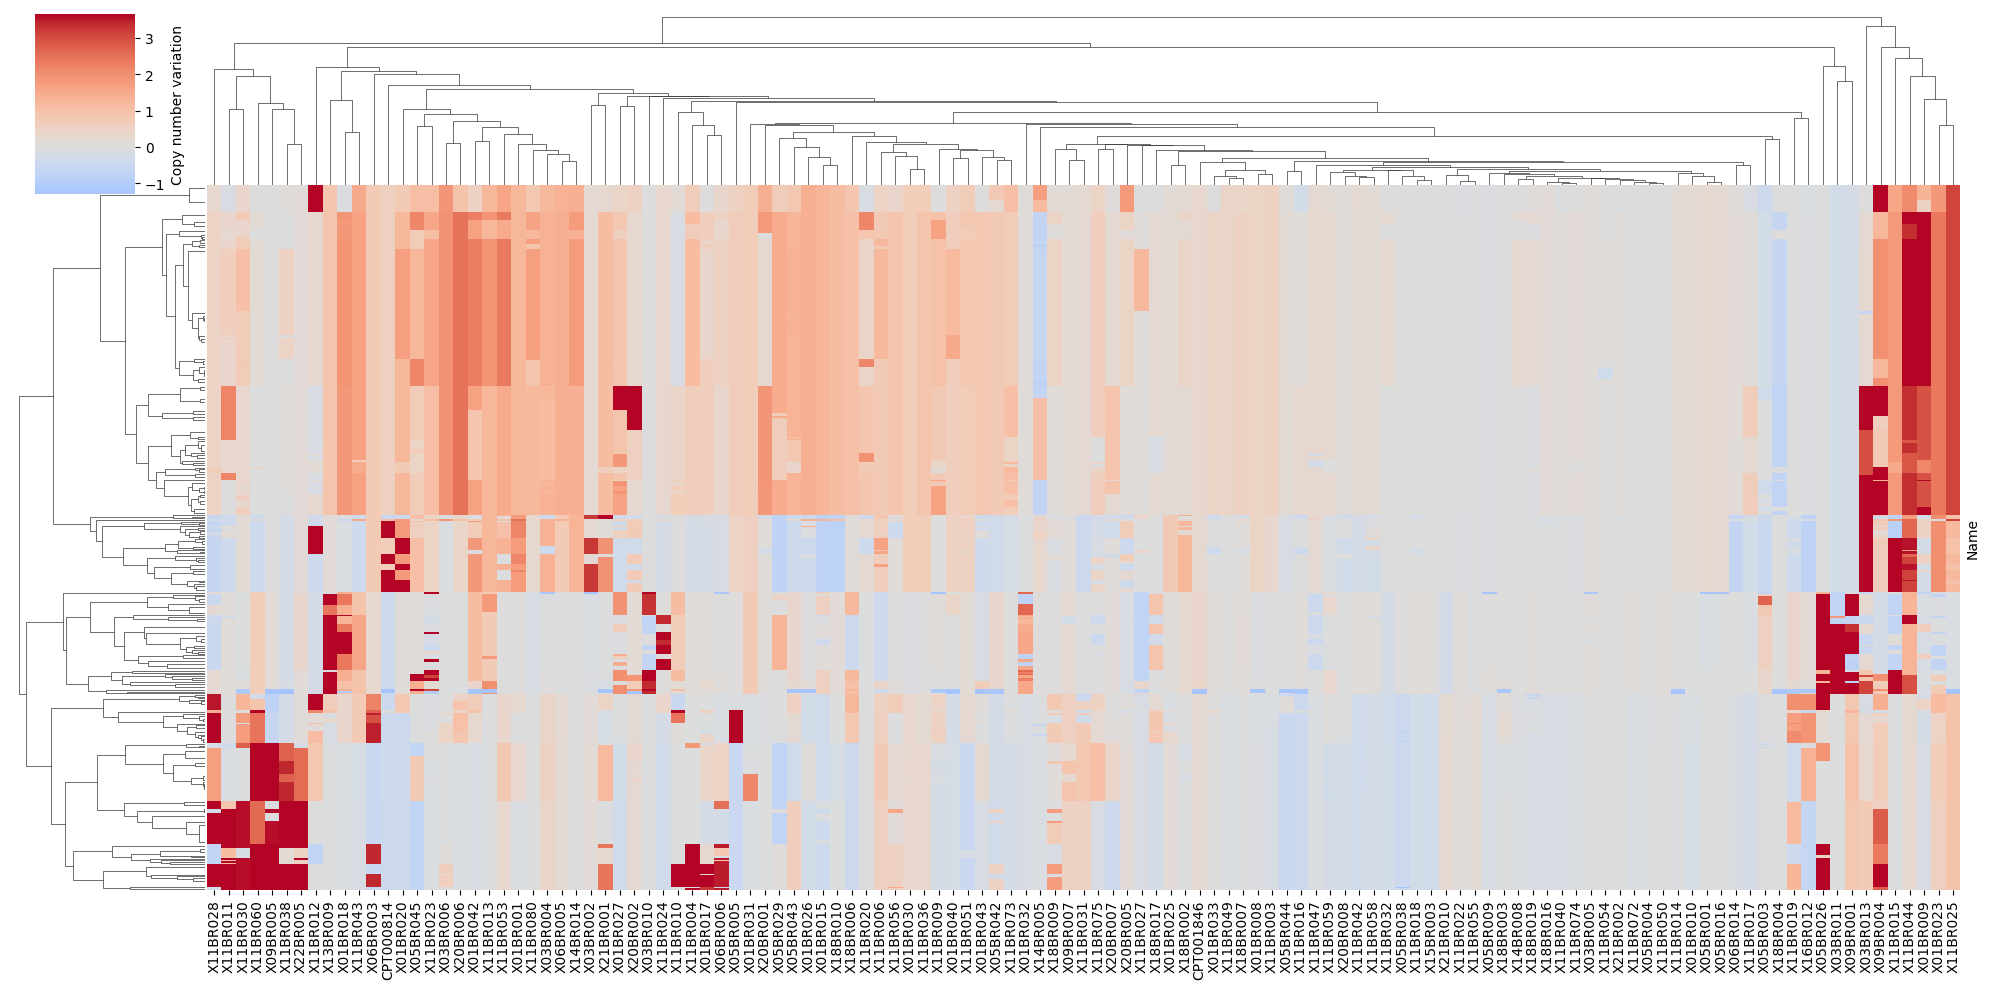

In [61]:
import seaborn as sns

df = sorted_df.iloc[:,3:]
df_gene = df.iloc[:, :-1].groupby(df.index).mean()

# Filter genes with low variance
var_cutoff = 0.5  # Adjust as needed
gene_var = df_gene.var(axis=1)
df_gene = df_gene.loc[gene_var >= var_cutoff]

# Create heatmap
sns.clustermap(df_gene, cmap='coolwarm', center=0, metric='euclidean',
               row_cluster=True, figsize=(20, 10), dendrogram_ratio=(0.1, 0.2),
               cbar_kws={'label': 'Copy number variation'},
               yticklabels=False, xticklabels=True)